### Feature selection table results per timegroup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import psycopg2
import pandas.io.sql as psql
from sqlalchemy import create_engine
import sshtunnel 
import psycopg2.extras
import csv
import re

In [2]:
def get_data_regularity():
    
    #SQL statement regularity_trip_timegroups_results
    sql = """select *
from regularity_trip_timegroups_results
order by route_short_name, stop_id, direction_id, from_date_time"""
    
    #database connection

    try:
        sshtunnel.SSH_TIMEOUT = 10.0
        with sshtunnel.SSHTunnelForwarder(
                ('3.83.88.154', 22),
                ssh_username='ec2-user',
                #CHANGE PATH TO rds-example.cer
                ssh_pkey='/Users/lauraforerocamacho/Downloads/rds-example.cer',
                remote_bind_address=('stib-mivb.cjo3cnpt9pci.us-east-1.rds.amazonaws.com', 5432)
        ) as tunnel:
                conn = psycopg2.connect(
                        host='127.0.0.1',
                        port=tunnel.local_bind_port,     
                        database="stibmivbdb",
                        user="postgres",
                        password="stib-mivb-db1")

                cur = conn.cursor()
                #perform sql and write result to dataframe
                cur.execute(sql)
                field_names = [i[0] for i in cur.description]
                query_results = pd.DataFrame(cur.fetchall(),columns=field_names)
                #close connection
                cur.close()
                
                return query_results
    except Exception as e:
            print(e)

In [74]:
def get_defined_intervals():
    
    #SQL statement regularity_trip_timegroups_results
    sql = """select *
from defined_intervals
order by from_time"""
    
    #database connection

    try:
        sshtunnel.SSH_TIMEOUT = 10.0
        with sshtunnel.SSHTunnelForwarder(
                ('3.83.88.154', 22),
                ssh_username='ec2-user',
                #CHANGE PATH TO rds-example.cer
                ssh_pkey='/Users/lauraforerocamacho/Downloads/rds-example.cer',
                remote_bind_address=('stib-mivb.cjo3cnpt9pci.us-east-1.rds.amazonaws.com', 5432)
        ) as tunnel:
                conn = psycopg2.connect(
                        host='127.0.0.1',
                        port=tunnel.local_bind_port,     
                        database="stibmivbdb",
                        user="postgres",
                        password="stib-mivb-db1")

                cur = conn.cursor()
                #perform sql and write result to dataframe
                cur.execute(sql)
                field_names = [i[0] for i in cur.description]
                query_results = pd.DataFrame(cur.fetchall(),columns=field_names)
                #close connection
                cur.close()
                
                return query_results
    except Exception as e:
            print(e)

In [142]:
data=get_data_regularity()
data=data.dropna()

In [184]:
intervals=get_defined_intervals()

In [185]:
intervals.head()

,from_time,to_time
0,2021-09-01 00:00:00,2021-09-01 00:30:00
1,2021-09-01 00:30:00,2021-09-01 01:00:00
2,2021-09-01 01:00:00,2021-09-01 01:30:00
3,2021-09-01 01:30:00,2021-09-01 02:00:00
4,2021-09-01 02:00:00,2021-09-01 02:30:00


In [186]:
intervals["data"]=None

In [167]:
data.head()

,route_id,route_short_name,stop_id,direction_id,from_date_time,to_date_time,from_time,to_time,from_date,to_date,...,thursday,friday,saturday,sunday,route_type,waiting_time_real,waiting_time_scheduled,ewt,ewt_minutes,ewt_category
5,2,1,8011,1,2021-09-01 05:48:57,2021-09-17 20:24:07,05:48:57,20:24:07,2021-09-01,2021-09-17,...,1,1,0,0,1,232.871609,39.160125,193,3.228525,0-4MIN
6,2,1,8011,1,2021-09-01 20:34:07,2021-09-17 23:48:53,20:34:07,23:48:53,2021-09-01,2021-09-17,...,1,1,0,0,1,410.917755,145.023148,265,4.431577,4-8MIN
7,2,1,8011,1,2021-09-04 06:44:23,2021-09-18 23:48:53,06:44:23,23:48:53,2021-09-04,2021-09-18,...,0,0,1,0,1,259.528527,57.318244,202,3.370171,0-4MIN
8,2,1,8011,1,2021-09-12 08:42:04,2021-09-12 23:48:53,08:42:04,23:48:53,2021-09-12,2021-09-12,...,0,0,1,0,1,286.690589,54.203186,232,3.874790,0-4MIN
9,2,1,8011,1,2021-09-19 06:44:23,2021-09-19 23:48:53,06:44:23,23:48:53,2021-09-19,2021-09-19,...,0,0,1,0,1,308.359592,43.434227,264,4.415423,4-8MIN


In [187]:
intervals.head()

,from_time,to_time,data
0,2021-09-01 00:00:00,2021-09-01 00:30:00,None
1,2021-09-01 00:30:00,2021-09-01 01:00:00,None
2,2021-09-01 01:00:00,2021-09-01 01:30:00,None
3,2021-09-01 01:30:00,2021-09-01 02:00:00,None
4,2021-09-01 02:00:00,2021-09-01 02:30:00,None


In [169]:
data["ewt"]= data["ewt"].astype(int)


In [170]:
data["from_date_time"]= pd.to_datetime(data["from_date_time"])
data["to_date_time"]= pd.to_datetime(data["to_date_time"])

In [219]:
intervals_data=[]
for i in range(0, len(intervals)):
    c_interval=intervals.iloc[i].to_dict()
    temp=[]
    find_elements_range=data[(data["from_date_time"].dt.time<=c_interval["from_time"].time())&(c_interval["to_time"].time()<=data["to_date_time"].dt.time)&(data["from_date_time"].dt.date<=c_interval["from_time"].date())&(c_interval["to_time"].date()<=data["to_date_time"].dt.date)&(data["ewt"]>(6*60))]
    
    if(len(find_elements_range)>0):
        temp=find_elements_range["stop_id"].unique()
    #intervals_data.append(' '.join(str(item) for item in temp))
    if(len(temp)==0):
        temp=None
    intervals_data.append(temp)
intervals["data"]=intervals_data

In [220]:
intervals=intervals.dropna()

In [221]:
intervals["from_date"]=intervals["from_time"].dt.date
intervals_data_final=intervals.groupby("from_date")["data"].apply(list).reset_index(name='pattern')

In [222]:
intervals_data_final.head(n=100)

,from_date,pattern
0,2021-09-01,"[[1203, 1487, 2257, 2259, 2260, 2261, 2319, 25..."
1,2021-09-02,"[[1203, 1487, 2257, 2259, 2260, 2261, 2319, 25..."
2,2021-09-03,"[[1203, 1487, 2257, 2259, 2260, 2261, 2319, 25..."
3,2021-09-04,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."
4,2021-09-05,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."
5,2021-09-06,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."
6,2021-09-07,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."
7,2021-09-08,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."
8,2021-09-09,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."
9,2021-09-10,"[[5230], [1203, 1487, 2257, 2259, 2260, 2261, ..."


In [226]:
for i in range(0, len(intervals_data_final)):
    c_interval=intervals_data_final.iloc[i].to_dict()
    intervals_data_final["pattern"][i]=np.array(intervals_data_final["pattern"][i]).tostring()

In [126]:
!pip3 install prefixspan --user

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.7 MB/s eta 0:00:00
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11219 sha256=eba55ca6f3ebb9125d8e015276e0dfd8571dd1e792d0235bea114ae5d6c685c9
  Stored in directory: /Users/lauraforerocamacho/Library/Caches/pip/wheels/85/bb/09/05c3cad48d0336b16e608274276fb337c3f7b2ec1d79136c9e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=e7593f2212e3d7efaba1dd51ba437b340bfc5dce1a95e26ee4d3ebfe3fafb9fd
  Stored in directory: /Users/lauraforerocamacho/Library/Caches/pip/wheels/ca/cc/e3/f1e272f628fdb013d969acc99cfe2e031ea15b3efb74ffe842
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28867 sha256=87f10ba9769302dcd2cc91eac77b2bae78e2bc6fa32476dddd6af34ccc855a31
  Stored in directory: /Users/lauraforerocamacho/Librar

In [227]:
from prefixspan import PrefixSpan
ps = PrefixSpan(intervals_data_final["pattern"])


In [228]:
print(ps.frequent(2))

In [ ]:
print(ps.topk(5))

In [ ]:
print(ps.frequent(2, closed=True))

In [ ]:
print(ps.topk(5, closed=True))


In [47]:
data["ewt"]= data["ewt"].astype(int)/60

array([[<AxesSubplot:title={'center':'ewt'}>]], dtype=object)

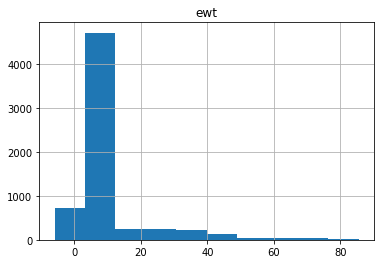

In [48]:
data.hist(column='ewt')

,det_rank,det_weight
ewt_minutes,0,1.000000
waiting_time_real,1,0.991777
route_short_name,2,0.041216
waiting_time_scheduled,3,0.018227
route_id,4,0.015993
route_type,5,0.013986
saturday,6,0.008609
friday,7,0.008187
thursday,8,0.008187
wednesday,9,0.008187


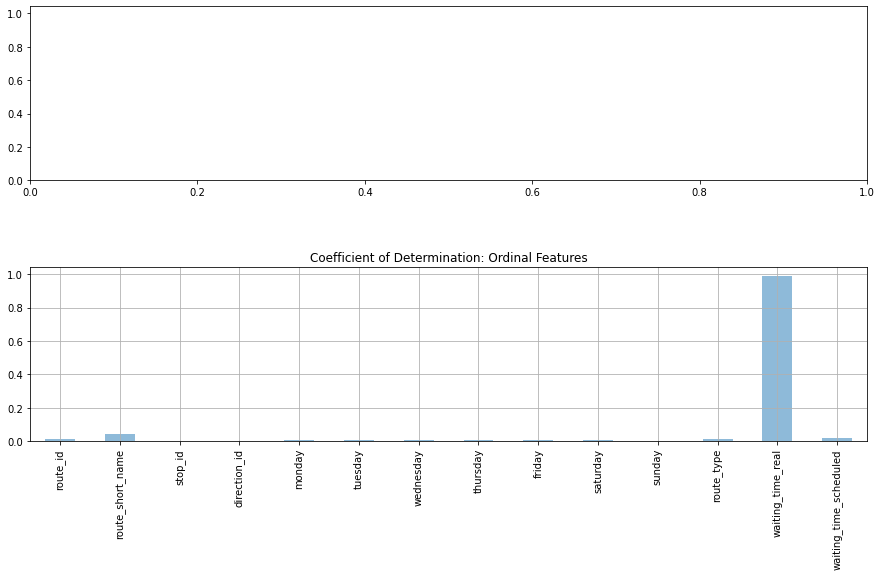

In [49]:
ordinal_features=['route_id', 'route_short_name', 'stop_id', 'direction_id',
        'from_time', 'to_time', 'from_date',
       'to_date', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'route_type', 'waiting_time_real',
       'waiting_time_scheduled',  'ewt_category']

# Correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharey=True)
plt.subplots_adjust(hspace=0.5)



# ordinal features
data[ordinal_features].corrwith(data.ewt).agg('square').plot.bar(ax=ax2, alpha=0.5)
ax2.set_title('Coefficient of Determination: Ordinal Features')
ax2.grid()


#Get table correlation

results = pd.DataFrame(data.drop('ewt', axis=1).corrwith(data.ewt).agg('square'), 
                       columns=['det_weight'])

ranks = np.zeros(len(results), dtype=np.int)
for i, j in enumerate(np.argsort(results.det_weight)[::-1]):
    ranks[j] = i
results['det_rank'] = ranks

results.sort_values('det_rank').loc[:, ['det_rank', 'det_weight']].iloc[0:10]

In [13]:
!pip3 install scikit-learn scipy matplotlib --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 2.8 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [65]:
features=['route_id', 'route_short_name', 'stop_id', 'direction_id',
        'from_time', 'to_time', 'from_date',
       'to_date', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'route_type', 'waiting_time_real',
       'waiting_time_scheduled',  'ewt_category']
X=data[['route_id', 'route_short_name', 'stop_id', 'direction_id',
        'from_time', 'to_time', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'route_type', 'waiting_time_real',
       'waiting_time_scheduled']]
Y=data["ewt_category"]

In [66]:
from sklearn import preprocessing


for i  in ['from_time', 'to_time']:
    le = preprocessing.LabelEncoder()
    X[i]=le.fit_transform(X[i].astype(str))

In [67]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[1.226e+04 1.785e+04 1.693e+06 6.578e+01 1.281e+05 1.851e+05 6.178e+01
 6.178e+01 6.178e+01 6.178e+01 6.178e+01 4.717e+01 6.750e+01 7.679e+02
 3.125e+06 2.001e+04]
[[8011.     164.    2432.     300.65 ]
 [8011.    3854.    3360.     301.041]
 [8011.     602.    3360.     341.022]
 [8011.    1385.    3360.     286.691]
 [8011.     602.    3360.     308.36 ]]


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Feature extraction
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [ True  True  True False  True  True False False False False False False
 False  True  True  True]
Feature Ranking: [1 1 1 2 1 1 5 7 6 4 3 8 9 1 1 1]


In [71]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', RobustScaler()), 
                 ('model', Lasso(random_state=42))])

param_space = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(pipe, param_grid=param_space, cv=10, scoring='neg_mean_squared_error')

grid.fit(X, data["ewt"])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso(random_state=42))]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [72]:
print('best-fit parameters:', grid.best_params_)
print('prediction rms residuals:', 10**(np.sqrt(-grid.best_score_)))

best-fit parameters: {'model__alpha': 0.001}
prediction rms residuals: 1.013359649600832


In [73]:
weights = grid.best_estimator_.steps[1][1].coef_

results['lasso_weight'] = weights

ranks = np.zeros(len(results), dtype=np.int)
for i, j in enumerate(np.argsort(weights)[::-1]):
    ranks[j] = i
results['lasso_rank'] = ranks

results.sort_values('lasso_rank').loc[:, ['lasso_rank', 'lasso_weight']].iloc[0:10]

ValueError: Length of values (16) does not match length of index (15)

### Random forest to see insights 

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features=[]

X = data[features]
y = data.ewt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

### Model Sequential